



**The difference between Automaic and Manual in prices and power on the most 2 frequent types of cars used:**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statistics import *

In [ ]:
#Reading the data 
data = pd.read_csv('/content/Car_sale_ads.csv')

In [ ]:
# Checking the data
data

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208299,208299,39900,PLN,Used,Żuk,Other,NaN,NaN,2014,40000.0,...,Manual,small_cars,1.0,other,NaN,NaN,NaN,30/04/2021,"ul. Huzarska 12 - 47-400 Racibórz, raciborski,...",[]
208300,208300,10900,PLN,Used,Żuk,Other,NaN,NaN,1970,63518.0,...,Manual,station_wagon,4.0,other,Poland,NaN,NaN,02/05/2021,"Włocławek, Kujawsko-pomorskie",[]
208301,208301,6900,PLN,Used,Żuk,Other,NaN,NaN,1977,11880.0,...,Manual,SUV,3.0,red,NaN,NaN,11/06/1977,28/04/2021,"Złotów, złotowski, Wielkopolskie",[]
208302,208302,5700,PLN,Used,Żuk,Other,NaN,NaN,1986,100000.0,...,Manual,minivan,2.0,blue,NaN,NaN,NaN,24/04/2021,"Kraczkowa, łańcucki, Podkarpackie",[]


Cleaning the data only needed for the research question

In [ ]:
# Creating a subset dataframe that is needed for the research question
newData= data[['Type','Transmission','Power_HP','Price','Vehicle_model','Currency']]

In [ ]:
#Missing values in the data
nullData=newData.isnull().sum()
nullData

Type               0
Transmission     479
Power_HP         643
Price              0
Vehicle_model      0
Currency           0
dtype: int64

In [ ]:
# Percentage of missing data: ---> 0% of data are null values
data_count = np.product(newData.shape)
(nullData.sum()/data_count)*100

0.08977263998771028

In [ ]:
# Percentage of missing data in each column to make sure that all the data exist
newData.isnull().sum() / newData.shape[0] * 100

Type             0.000000
Transmission     0.229952
Power_HP         0.308683
Price            0.000000
Vehicle_model    0.000000
Currency         0.000000
dtype: float64

In [ ]:
# Since the percentage error is approximate 0% we will drop all rows which have missing values
newData= newData.dropna(axis=0)
# Ensuring that there are no missing values
newData.isnull().sum() / newData.shape[0] * 100


Type             0.0
Transmission     0.0
Power_HP         0.0
Price            0.0
Vehicle_model    0.0
Currency         0.0
dtype: float64

In [ ]:
# Generalizing the price to be in dollars:

# Checking what type of currencies do we have in the dataset -> PLN=0.2$ EUR=1.05$
newData.Currency.unique()

#Converting the price column based on the currency 
(newData['Price'][newData['Currency'] == 'PLN'])= (newData['Price'][newData['Currency'] == 'PLN'])*0.2 
(newData['Price'][newData['Currency'] == 'EUR'])= (newData['Price'][newData['Currency'] == 'EUR'])*1.05
                                                                  
newData

<ipython-input-66-eabdb576f5e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (newData['Price'][newData['Currency'] == 'PLN'])= (newData['Price'][newData['Currency'] == 'PLN'])*0.2
<ipython-input-66-eabdb576f5e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (newData['Price'][newData['Currency'] == 'EUR'])= (newData['Price'][newData['Currency'] == 'EUR'])*1.05


,Type,Transmission,Power_HP,Price,Vehicle_model,Currency
0,small_cars,Manual,145.0,17240.0,595,PLN
1,coupe,Manual,75.0,8700.0,Other,PLN
2,small_cars,Automatic,180.0,8980.0,500,PLN
3,small_cars,Manual,160.0,7980.0,500,PLN
4,small_cars,Manual,165.0,19580.0,595,PLN
...,...,...,...,...,...,...
208299,small_cars,Manual,173.0,7980.0,Other,PLN
208300,station_wagon,Manual,70.0,2180.0,Other,PLN
208301,SUV,Manual,60.0,1380.0,Other,PLN
208302,minivan,Manual,36.0,1140.0,Other,PLN


Start analysing and visualizing the data 

In [ ]:
# Getting the most 2 frequent types of cars used:
newData['Type'].value_counts()[0:2]

SUV              41479
station_wagon    40121
Name: Type, dtype: int64

In [ ]:
# Filtering the data to get the only the two types of cars needed
df= newData[['Type','Transmission','Price','Power_HP']]
x=df.loc[(df['Type'] != 'station_wagon') & (df['Type'] != 'SUV')].index
x
df.drop(x , inplace = True )
df

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Type,Transmission,Price,Power_HP
57,SUV,Automatic,14200.0,273.0
59,SUV,Automatic,10400.0,300.0
61,SUV,Automatic,14800.0,201.0
62,SUV,Automatic,7380.0,300.0
63,SUV,Automatic,11980.0,315.0
...,...,...,...,...
208269,SUV,Automatic,3720.0,163.0
208270,station_wagon,Manual,4980.0,136.0
208271,SUV,Automatic,30896.0,197.0
208300,station_wagon,Manual,2180.0,70.0


In [ ]:
# Unique values in the dataset
df.nunique()

Type               2
Transmission       2
Price           9344
Power_HP         401
dtype: int64

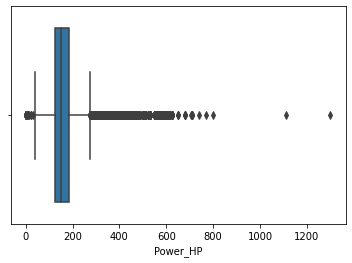

In [ ]:
# Handling outliers in power and price
sns.boxplot(x = df['Power_HP'])
plt.show()

In [ ]:
df['Power_HP'].describe()

count    81600.000000
mean       166.347341
std         68.391088
min          1.000000
25%        125.000000
50%        150.000000
75%        185.000000
max       1300.000000
Name: Power_HP, dtype: float64

In [ ]:
q1=125
q2=150
q3=185
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print( ub, lb,iqr)

275.0 35.0 60


In [ ]:
df['condition']=( df['Power_HP']> 275) | ( df['Power_HP']<35)

<ipython-input-73-7a67aa3f1cc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition']=( df['Power_HP']> 275) | ( df['Power_HP']<35)


In [ ]:
m=df[df["condition"]].index
print(m)
df.drop(m, inplace=True)

Int64Index([    59,     62,     63,     64,     67,     68,     69,     70,
                72,    208,
            ...
            208067, 208088, 208109, 208114, 208138, 208155, 208175, 208214,
            208247, 208253],
           dtype='int64', length=5529)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
#Data after dropping Power_HP outliers 
df

,Type,Transmission,Price,Power_HP,condition
57,SUV,Automatic,14200.0,273.0,False
61,SUV,Automatic,14800.0,201.0,False
65,SUV,Automatic,11580.0,270.0,False
206,station_wagon,Manual,3580.0,140.0,False
215,station_wagon,Automatic,4580.0,200.0,False
...,...,...,...,...,...
208269,SUV,Automatic,3720.0,163.0,False
208270,station_wagon,Manual,4980.0,136.0,False
208271,SUV,Automatic,30896.0,197.0,False
208300,station_wagon,Manual,2180.0,70.0,False


In [ ]:
df['Price'].sort_values(ascending=False).head()


32304     1399800.0
90963      144322.5
183142     139999.8
178999     139980.0
132595     139980.0
Name: Price, dtype: float64

In [ ]:
#Going to drop index 32304 as it is definelty an outlier
df.drop(32304, inplace=True)
df.drop(90963, inplace=True)
df.drop(90972, inplace=True)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# After dropping prices outliers and dropping the condition column
df=df.drop(['condition'], axis=1)
df

,Type,Transmission,Price,Power_HP
57,SUV,Automatic,14200.0,273.0
61,SUV,Automatic,14800.0,201.0
65,SUV,Automatic,11580.0,270.0
206,station_wagon,Manual,3580.0,140.0
215,station_wagon,Automatic,4580.0,200.0
...,...,...,...,...
208269,SUV,Automatic,3720.0,163.0
208270,station_wagon,Manual,4980.0,136.0
208271,SUV,Automatic,30896.0,197.0
208300,station_wagon,Manual,2180.0,70.0


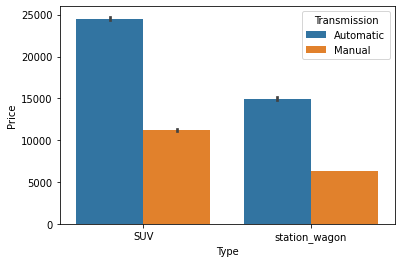

In [ ]:
# Clearly the SUV is sold at higher prices than the wagon whether it is automatic or manual
sns.barplot(data=df, y="Price", x="Type", hue="Transmission")

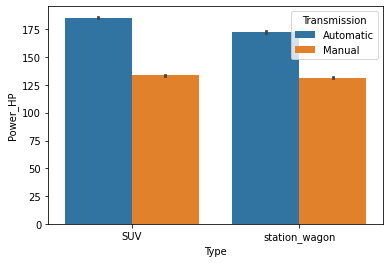

In [ ]:
# Automatic cars have higher horse power than manual cars
# SUV has higher horse power than the station Wagon in both transmission
sns.barplot(data=df, y="Power_HP", x="Type", hue="Transmission")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

How does the horsepower affect the price?

Text(0, 0.5, 'Price')

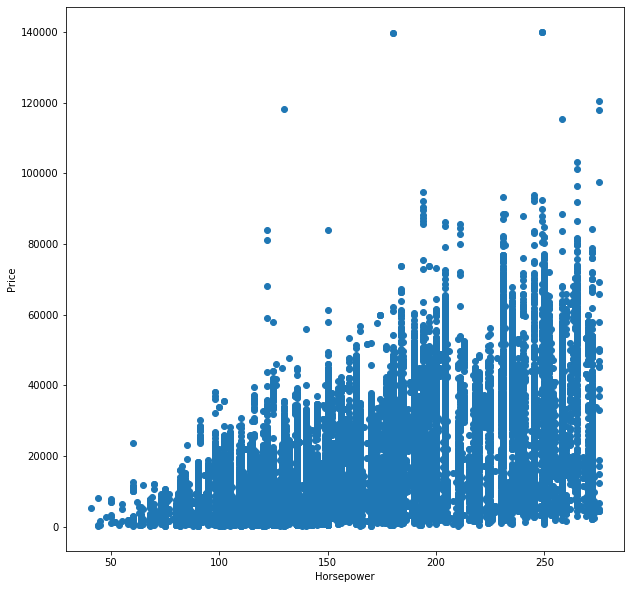

In [ ]:
# As horse power increase price increase
plt.figure(figsize=(10,10))
plt.scatter(x='Power_HP',y='Price',data=df)
plt.xlabel('Horsepower')
plt.ylabel('Price')

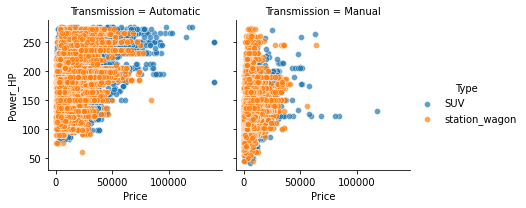

In [ ]:
# In Automatic cars:
# As Price increase power increase
# In Automatic cars the suv has higher increase in price and power than station wagon
# In Manual cars:
# The graph is continuous, indicating that there is no direct relationship betweem the price and power in both types of cars
g = sns.FacetGrid(df, col="Transmission", hue='Type')
g.map(sns.scatterplot,"Price","Power_HP", alpha=.7)
g.add_legend()